# Chapter 3 - Diagnostics and Remedial Measures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.api import het_breuschpagan, anova_lm
from statsmodels.formula.api import ols
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats

DATA_DIR = "../data"
yhat = '\u0177'
square = '\u00b2'

# 3.1 Diagnostics for Predictor Variable (p 100)

### Input the Toluca Company Data

In [2]:
df = pd.read_pickle(f"{DATA_DIR}/CH01TA01.xz")
df.columns = ['x', 'y']
model = ols("y ~ x", data=df).fit()

### Figure 3.1 (p 101)

Diagnostic plots for Predictor Variable -- Toluca Company Example

##### Note

The stem-and-leaf plot is excluded here. There does not appear to be any good implementation I found, and honestly it isn't any more useful than what the other graphics supply. Also, the dot plot here is just a bar graph instead of dots. But again, for distributions I would stick to histograms and box plots, if I were you. 

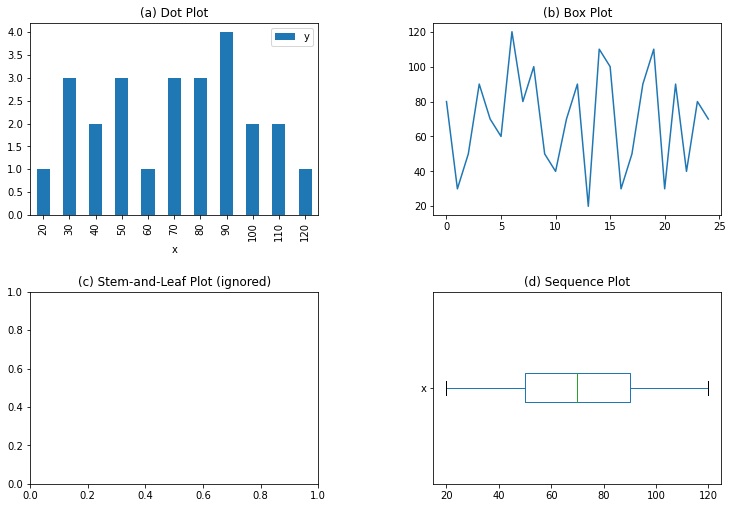

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
axes[0][0].set_title("(a) Dot Plot")
axes[0][1].set_title("(b) Box Plot")
axes[1][0].set_title("(c) Stem-and-Leaf Plot (ignored)")
axes[1][1].set_title("(d) Sequence Plot")

df.groupby("x").count().plot(kind="bar", ax=axes[0][0])
df.x.plot(kind="line", ax=axes[0][1])
df.x.plot(kind="box", vert=False, ax=axes[1][1])

plt.show()

# 3.2 Residuals (p 102)

This section talks about

* Properties of Residuals: Mean, Variance, Nonindependence.
* Semistudentized Residuals: normalize error $\frac{e_i}{\sqrt{MSE}}$
* Departures from Model to be Studied by Residuals

This last section the authors list out the 6 types of departures from the simple linear regression model (2.1) that can be explored using residual analysis. 

1. The regression function is not linear.
2. The error terms do not have constant variance.
3. The error terms are not independent.
4. The model fits all but one or a few outlier observations.
5. The error terms are not normally distributed.
6. One or serveral important predictor variables have been omitted from the model.

# 3.3 Diagnostics for Residuals (p 103)

### Figure 3.2 (p 104)

Diagnostic Residual Plots -- Toluca Company Example

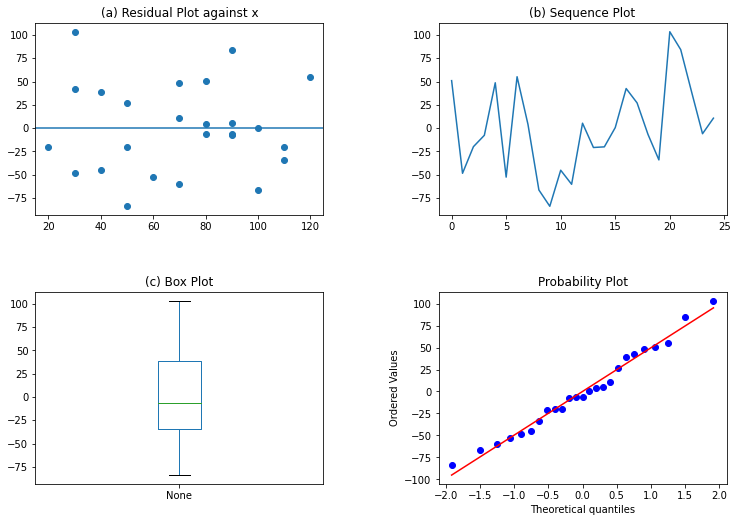

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
axes[0][0].set_title("(a) Residual Plot against x")
axes[0][1].set_title("(b) Sequence Plot")
axes[1][0].set_title("(c) Box Plot")
axes[1][1].set_title("(d) Normal Probability (QQ) Plot")

axes[0][0].scatter(df.x, model.resid)
axes[0][0].axhline(y=0)
model.resid.plot(kind="line", ax = axes[0][1])
model.resid.plot(kind="box", ax = axes[1][0])
qq = stats.probplot(model.resid, plot=axes[1][1])
plt.show()

# Alternative qqplot
# statsmodels.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Input the Transit Data

In [5]:
df = pd.read_pickle(f"{DATA_DIR}/CH03TA01.xz")
df.columns = ['y', 'x']
model = ols("y ~ x", data=df).fit()

### Figure 3.3 (p 105)

Scatter Plot and Residual Plot Illustrating Nonlinear Regression -- Transit Example

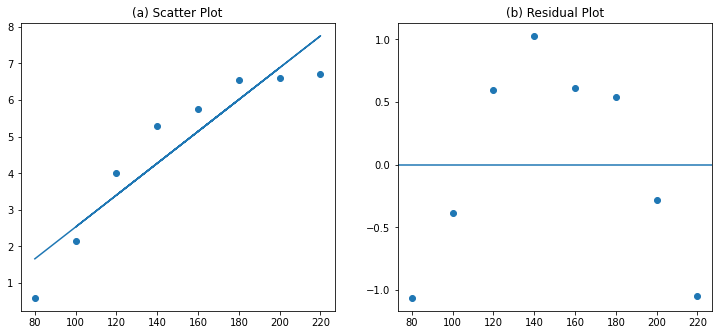

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
axes[0].set_title("(a) Scatter Plot")
axes[1].set_title("(b) Residual Plot")

axes[0].scatter(df.x, df.y)
axes[0].plot(df.x, model.fittedvalues)
axes[1].scatter(df.x, model.resid)
axes[1].axhline(y=0)
plt.show()

### Table 3.1 (p 105)

Number of Maps Distributed (x) and Increase in Ridership (y) -- Transit Example

In [7]:
tbl = pd.concat([df.y, df.x, model.fittedvalues, model.resid], axis=1)
tbl.columns = ['Increase in Ridership', 'Maps Distributed', "Fitted Values", 'Residuals']
tbl.round(2)

,Increase in Ridership,Maps Distributed,Fitted Values,Residuals
0,0.60,80,1.66,-1.06
1,6.70,220,7.75,-1.05
2,5.30,140,4.27,1.03
3,4.00,120,3.40,0.60
4,6.55,180,6.01,0.54
5,2.15,100,2.53,-0.38
6,6.60,200,6.88,-0.28
7,5.75,160,5.14,0.61


### Back to Toluca Company Example

In [8]:
df = pd.read_pickle(f"{DATA_DIR}/CH01TA01.xz")
df.columns = ['x', 'y']
model = ols("y ~ x", data=df).fit()

### Table 3.2 (p 111)

Residuals and Expected Values under Normality -- Toluca Company Example

######  Note

Since `stats.probplot` returns values in sorted order (for plotting), we make sure to put the residuals in sorted order, too. Thus, the rank column becomes an index. However, you can see the original order that Pandas maintains as the table index.

In [9]:
pd.DataFrame({
    "Residual": model.resid.sort_values(),
    "Rank": model.resid.sort_values().rank(),
    "Expected Values under Normality": stats.probplot(model.resid)[0][1]
})
#model.resid
#tbl.columns = ["Residual", "Rank", "Expected Values under Normality"]
#tbl.round(2)

,Residual,Rank,Expected Values under Normality
9,-83.875960,1.0,-83.875960
8,-66.386061,2.0,-66.386061
11,-60.280000,3.0,-60.280000
5,-52.577980,4.0,-52.577980
1,-48.471919,5.0,-48.471919
10,-45.173939,6.0,-45.173939
19,-34.088081,7.0,-34.088081
13,-20.769899,8.0,-20.769899
14,-20.088081,9.0,-20.088081
2,-19.875960,10.0,-19.875960


# 3.4 Overview of Tests Involving Residuals (p 114)

This short section just discusses a few main testing concepts which are further explored below.

* Tests for Randomness
* Tests for Constancy of Variance
* Tests for Outliers
* Tests for Normality

# 3.5 Correlation Test for Normality (p 115)

A one paragraph section that you can compare the coefficient of correlation between the ordered residuals and their expected values under normality (0.991 in this case) with a modeled output (see Table B.6). For $\alpha=0.05$ and $n=25$ this critical value is 0.959. Since the correlation coefficient is larger, this supports the earlier conclusion that the distribution of the error terms does not depart substantionally from a normal distribution.

# 3.6 Tests for Constancy of Error Variance (p 116)

### Table 3.3 (p 117)

Brown-Forsythe Test for Constancy of Error Variance -- Toluca Company Example

##### Note

The Brown-Forsythe test is a modification of the Levene test, using median differences instead of means. The `stats.levene` function has a `center="median"` parameter for this purpose. See [References](#References) for more.

We manually have to split our data into 2 groups. Displayed below are the groups, the variance of each group, their respective medians, and the median centered data. 

In [10]:
group1 = model.resid[df.x < 80]
group1 = pd.DataFrame({
    "lot_size": group1,
    "centered": group1 - np.median(group1)
})
group2 = model.resid[df.x >= 80]
group2 = pd.DataFrame({
    "lot_size": group2,
    "centered": group2 - np.median(group2)
})

display(group1.round(2))
print(f"Group 1 Median: {round(np.median(group1.lot_size), 2)}")
print(f"Group 1 Variance: {round(np.var(group1.lot_size), 2)}")

display(group2.round(2))
print(f"Group 2 Median: {round(np.median(group2.lot_size), 2)}")
print(f"Group 2 Variance: {round(np.var(group2.lot_size), 2)}")

,lot_size,centered
1,-48.47,-28.60
2,-19.88,0.00
4,48.72,68.60
5,-52.58,-32.70
9,-83.88,-64.00
10,-45.17,-25.30
11,-60.28,-40.40
13,-20.77,-0.89
16,42.53,62.40
17,27.12,47.00


Group 1 Median: -19.88
Group 1 Variance: 2741.18


,lot_size,centered
0,51.02,53.70
3,-7.68,-5.00
6,55.21,57.89
7,4.02,6.70
8,-66.39,-63.70
12,5.32,8.00
14,-20.09,-17.40
15,0.61,3.30
18,-6.68,-4.00
19,-34.09,-31.40


Group 2 Median: -2.68
Group 2 Variance: 1551.77


### Brown-Forsythe Test

In [11]:
print(f"Critical value t(.975; 23) = {stats.t.ppf(1-0.05/2, len(df)-2)}")
stats.levene(group1.lot_size, group2.lot_size, center="median")

Critical value t(.975; 23) = 2.0686576104190406


LeveneResult(statistic=1.7331242269312932, pvalue=0.20098124005422963)

### Breusch-Pagan Test

In [12]:
bpnames = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(f"critical value: {stats.chi2.ppf(0.95, 1)}")
list(zip(bpnames, het_breuschpagan(model.resid, model.model.exog, robust=False)))
# Book is wrong about p-value. Should be 0.36

critical value: 3.841458820694124


[('Lagrange multiplier statistic', 0.8209192010359949),
 ('p-value', 0.3649115500891482),
 ('f-value', 1.091440770776925),
 ('f p-value', 0.3070086489533642)]

# 3.7 $F$ Test for Lack of Fit (p 119)

### Input the Bank Data

Replicate column here is added to arbitrarily number each repeated deposit amount ("treatment"). This is used below.

In [13]:
df = pd.read_pickle(f"{DATA_DIR}/CH03TA04.xz")
df.columns = ['x', 'y']
df["r"] = df.groupby(['x'])["y"].rank()
model = ols("y ~ x", data=df).fit()

### Table 3.4 (p 120)

Data and Analysis of Variance Table -- Bank Example

In [14]:
tbl = df.copy()
tbl.columns = ["Size of Minimum Diposit (x)", "Number of New Accounts (y)", "Replicate"]
display(tbl)

,Size of Minimum Diposit (x),Number of New Accounts (y),Replicate
0,125,160,2.0
1,100,112,1.0
2,200,124,2.0
3,75,28,1.0
4,150,152,1.0
5,175,156,2.0
6,75,42,2.0
7,175,124,1.0
8,125,150,1.0
9,200,104,1.0


In [15]:
display(model.summary())
display(anova_lm(model, typ=1))

C:\opt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     3.139
Date:                Mon, 26 Apr 2021   Prob (F-statistic):              0.110
Time:                        20:44:49   Log-Likelihood:                -55.211
No. Observations:                  11   AIC:                             114.4
Df Residuals:                       9   BIC:                             115.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.7225     39.398      1.287      0.230     -38.402     139.847
x              0.4867      0.275      1.772      0.110      -0.135       1.108
==============================================================================
Omnibus:                        2.835   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                1.083
Skew:                          -0.276   Prob(JB):                        0.582
Kurtosis:                       1.565   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,5141.338410,5141.338410,3.138882,0.110213
Residual,9.0,14741.570681,1637.952298,NaN,NaN


### Figure 3.11 (p 121)

Scatter Plot of Fitted Regression Line -- Bank Example

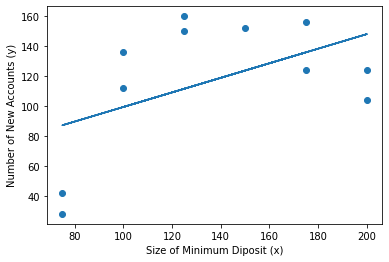

In [16]:
plt.scatter(df.x, df.y)
plt.xlabel("Size of Minimum Diposit (x)")
plt.ylabel("Number of New Accounts (y)")
plt.plot(df.x, model.fittedvalues)
plt.show()

### Table 3.5 (p 121)

Data Arranged by Replicate Number and Minimum Deposit -- Bank Example

In [17]:
display(df.sort_values("x").pivot(index='r', columns='x', values='y'))
display(df.sort_values("x").pivot(index='r', columns='x', values='y').mean())

x,75,100,125,150,175,200
r,,,,,,
1.0,28.0,112.0,150.0,152.0,124.0,104.0
2.0,42.0,136.0,160.0,NaN,156.0,124.0


x
75      35.0
100    124.0
125    155.0
150    152.0
175    140.0
200    114.0
dtype: float64

### Table 3.6 (p 126)

General ANOVA Table for Testing Lack of Fit of Simple Linear Regression Function and ANOVA -- Bank Example

##### Note

I am not sure if the `c-2` amount can be determined directly from the data/objects so it is hard coded here for now. 

In [18]:
model2 = ols("y ~ C(x)", data=df).fit()
display(anova_lm(model, typ=1))
display(anova_lm(model2, typ=1))
print(f"lack of fit := SEE - Pure Error: {model.ssr - model2.ssr}")
print(f"MSLF: {(model.ssr - model2.ssr) / 4}")
print(f"F statistic {model.fvalue}")  # equal to x MSE / e MSE ratio
print(f"F critical value {stats.f.ppf(0.90, 1, 9)}")  # model.f_test can do this for us


,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,5141.338410,5141.338410,3.138882,0.110213
Residual,9.0,14741.570681,1637.952298,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(x),5.0,18734.909091,3746.981818,16.319607,0.004085
Residual,5.0,1148.000000,229.600000,NaN,NaN


lack of fit := SEE - Pure Error: 13593.570680628269
MSLF: 3398.392670157067
F statistic 3.138881649384416
F critical value 3.36030302387155


# 3.8 Overview of Remedial Measures (p 127)

The authors explain:

> If the simple linear regression model (2.1) is not appropriate for a data set, there are two basic options:
> 
> 1. Abandon regression model (2.1) and develop and use a more appropriate model.
> 2. Employ some transformation on the data so that regression model (2.1) is appropriate for the transformed data.

This brief section expands on possible remedial measures, most of which will be explored in multiple regression throughout this book, leaving transformations to be reviewed below. 

Areas where remediation is necessary:

* Nonlinearity of Regression Function
* Nonconstancy of Error Variance
* Nonindependence of Error Terms
* Nonnormality of Error Terms
* Omission of Important Predictor Variables
* Outlying Observations


# 3.9 Transformations (p 129)

### Input the Sales Training Data

In [19]:
df = pd.read_pickle(f"{DATA_DIR}/CH03TA07.xz")
df.columns = ['x', 'y']
df = df.assign(sqrtx = lambda df: df.x**(1/2))

### Table 3.7 (p 130)

Use of Square Root Transformation of X to Linearize Regression Relation -- Sales Training Example

In [20]:
display(df)

,x,y,sqrtx
0,0.5,42.5,0.707107
1,0.5,50.6,0.707107
2,1.0,68.5,1.000000
3,1.0,80.7,1.000000
4,1.5,89.0,1.224745
5,1.5,99.6,1.224745
6,2.0,105.3,1.414214
7,2.0,111.8,1.414214
8,2.5,112.3,1.581139
9,2.5,125.7,1.581139


### Figure 3.14 (p 131)

Scatter Plots and Residual Plots -- Sales Training Example

##### Note

I added panel (e) and (f) to demonstrate the comparison plots not shown in the book.

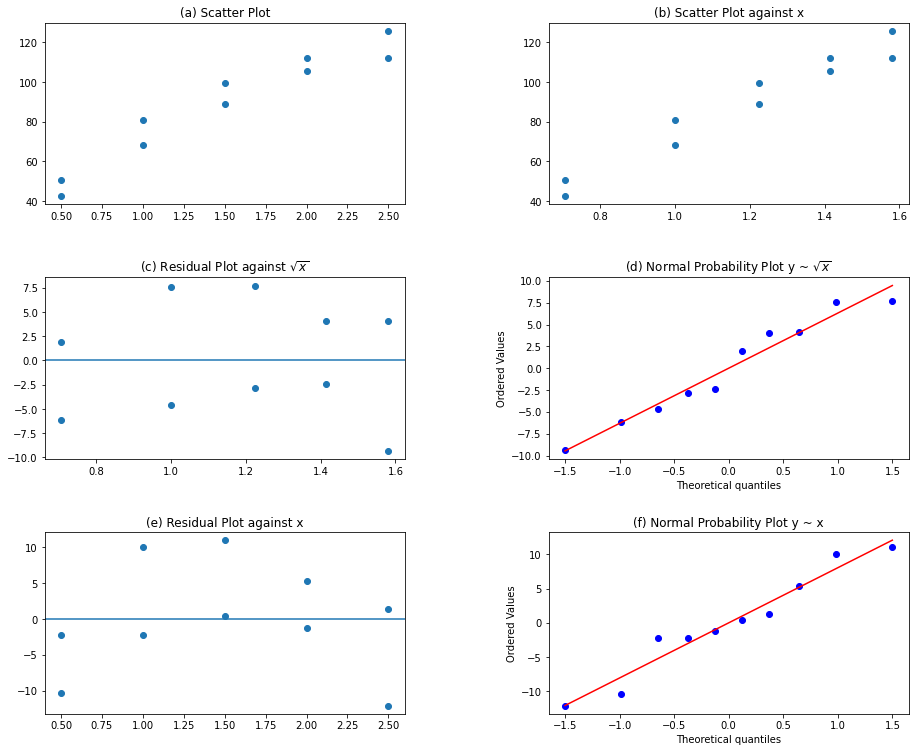

In [21]:
model = ols("y ~ x", data=df).fit()
model2 = ols("y ~ sqrtx", data=df).fit()

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

axes[0][0].scatter(df.x, df.y)
axes[0][1].scatter(df.sqrtx, df.y)

axes[1][0].scatter(df.sqrtx, model2.resid)
axes[1][0].axhline(y=0)
qq = stats.probplot(model2.resid, plot=axes[1][1])

axes[2][0].scatter(df.x, model.resid)
axes[2][0].axhline(y=0)
qq = stats.probplot(model.resid, plot=axes[2][1])

axes[0][0].set_title("(a) Scatter Plot")
axes[0][1].set_title("(b) Scatter Plot against x")
axes[1][0].set_title("(c) Residual Plot against $\sqrt{x}$")
axes[1][1].set_title("(d) Normal Probability Plot y ~ $\sqrt{x}$")
axes[2][0].set_title("(e) Residual Plot against x")
axes[2][1].set_title("(f) Normal Probability Plot y ~ x")
plt.show()

### Input the Plasma Levels Data

In [22]:
df = pd.read_pickle(f"{DATA_DIR}/CH03TA08.xz")
df.columns = ['x', 'y', 'z']

### Table 3.8 (p 133)

Use of Logarithmic Transformation of Y to Linearize Regression Relation and Stabilize Error Variance -- Plasma Levels Example

In [23]:
tbl = df.copy()
tbl.columns = ["Age", "Plasma", "Transform (log(Plasma)"]
display(tbl)

,Age,Plasma,Transform (log(Plasma)
0,0.0,13.44,1.1284
1,0.0,12.84,1.1086
2,0.0,11.91,1.0759
3,0.0,20.09,1.3030
4,0.0,15.60,1.1931
5,1.0,10.11,1.0048
6,1.0,11.38,1.0561
7,1.0,10.28,1.0120
8,1.0,8.96,0.9523
9,1.0,8.59,0.9340


### Figure 3.16 (p 134)

Scatter Plots and Residual Plots -- Plasma Levels Example

##### Note

Include panels (e) and (f) to compare the nonconstant error variance model to the transformed Y model.

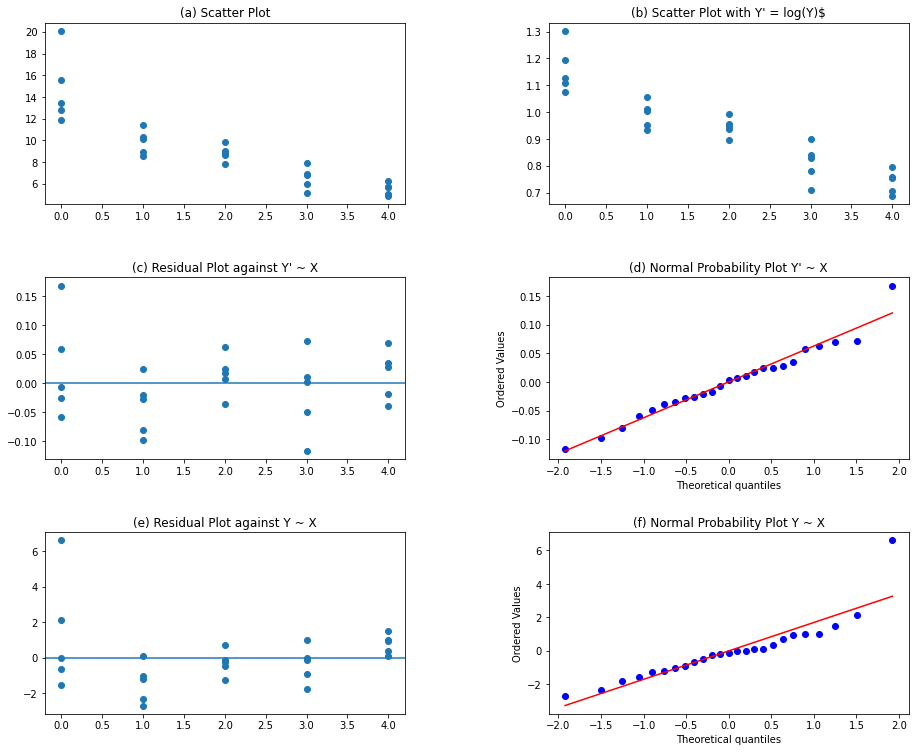

In [24]:
model = ols("z ~ x", data=df).fit()
model2 = ols("y ~ x", data=df).fit()

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

axes[0][0].scatter(df.x, df.y)
axes[0][1].scatter(df.x, df.z)

axes[1][0].scatter(df.x, model.resid)
axes[1][0].axhline(y=0)
qq = stats.probplot(model.resid, plot=axes[1][1])

axes[2][0].scatter(df.x, model2.resid)
axes[2][0].axhline(y=0)
qq = stats.probplot(model2.resid, plot=axes[2][1])

axes[0][0].set_title("(a) Scatter Plot")
axes[0][1].set_title("(b) Scatter Plot with Y' = log(Y)$")
axes[1][0].set_title("(c) Residual Plot against Y' ~ X")
axes[1][1].set_title("(d) Normal Probability Plot Y' ~ X")
axes[2][0].set_title("(e) Residual Plot against Y ~ X")
axes[2][1].set_title("(f) Normal Probability Plot Y ~ X")
plt.show()

### Table 3.9 and Figure 3.17 (p 136)

Box-Cox Results -- Plasma Levels Example

##### Notes

Since `stats.boxcox` and related functions (see below) perform the maximum likelihood estimation (MLE) of the optimal lambdas, we do not need to perform the manual exploration that minimizes fitted models SSE. However, for completeness, that is manually computed below after exploring the more directly approach using existing tools. See [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html) for more.

Also, `stats.boxcox_normmax` uses some other method I leave to the interested reader to explore. Because I haven't, yet. 

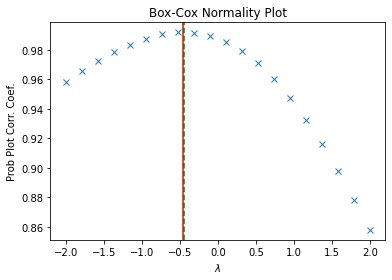

In [25]:
yl, lmax_mle = stats.boxcox(df.y)
lmax_pearsonr = stats.boxcox_normmax(df.y)
res = stats.boxcox_normplot(df.y, -2, 2, plot=plt, N=20)
plt.axvline(lmax_mle, color='r')
plt.axvline(lmax_pearsonr, color='g', ls='--')
plt.show()


{-2.0: 61.86,
 -1.9: 57.57,
 -1.8: 53.67,
 -1.7: 50.12,
 -1.6: 46.91,
 -1.5: 44.01,
 -1.4: 41.43,
 -1.3: 39.13,
 -1.2: 37.12,
 -1.1: 35.38,
 -1.0: 33.91,
 -0.9: 32.7,
 -0.8: 31.76,
 -0.7: 31.09,
 -0.6: 30.69,
 -0.5: 30.56,
 -0.4: 30.72,
 -0.3: 31.18,
 -0.2: 31.95,
 -0.1: 33.06,
 0.0: 34.52,
 0.1: 36.37,
 0.2: 38.64,
 0.3: 41.36,
 0.4: 44.59,
 0.5: 48.37,
 0.6: 52.76,
 0.7: 57.84,
 0.8: 63.67,
 0.9: 70.35,
 1.0: 77.98,
 1.1: 86.68,
 1.2: 96.59,
 1.3: 107.85,
 1.4: 120.64,
 1.5: 135.17,
 1.6: 151.65,
 1.7: 170.36,
 1.8: 191.6,
 1.9: 215.69,
 2.0: 243.05}

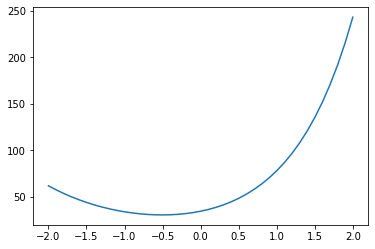

In [26]:
# Manual approach using "statistical methods" (ugh!)
from functools import partial
def boxcox_search(x, lmbda):
    n = len(x)
    k2 = np.prod(x)**(1/n)
    if lmbda == 0:
        return k2 * np.log(x)
    else:
        k1 = (lmbda * (k2**(lmbda-1)))**(-1)
        return k1*(x**lmbda - 1)

boxcox = partial(boxcox_search, df.y) # partially applied function encloses df.y reference
lambdas = [-2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, 
           -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 
           0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 
           1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
w = [boxcox(l) for l in lambdas]
res = [sum(ols("y ~ x", data=pd.DataFrame({"x": df.x, "y": y})).fit().resid**2) for y in w]
display({l: round(y, 2) for l, y in zip(lambdas, res)})
plt.plot(lambdas, res)

# 3.10 Exploration of Shape of Regression Function (p 137)

### Back to Toluca

In [27]:
df = pd.read_pickle(f"{DATA_DIR}/CH01TA01.xz")
df.columns = ['x', 'y']

### Figure 3.19 (p 140)

Lowess Curve and Confidence Band for Regression Line -- Toluca Company Example

##### Note

Unlike R this function seems difficult to work with. It sorts values (for plotting, sure), takes variables in the reverse order (y and then x?!), and throws `np.nan` values in a latter instance for some reason (repeated measures? strange neighborhoods?). In any case, that's a disappointment because I really liked R's `loess` function, but maybe the other kernel methods will prove more useful.

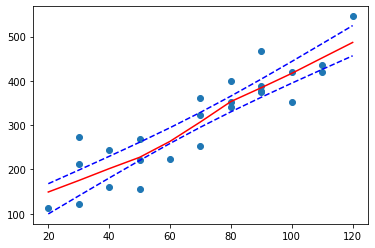

In [28]:
lws = lowess(df.y, df.x)
model = ols("y ~ x", data=df).fit()
prediction = pd.concat([df, model.get_prediction().summary_frame(alpha=0.1)], axis=1)
prediction = prediction.sort_values('x')

plt.scatter(df.x, df.y)
plt.plot(prediction.x, prediction.mean_ci_lower, 'b--')
plt.plot(prediction.x, prediction.mean_ci_upper, 'b--')
plt.plot(lws[:, 0], lws[:, 1], 'r', lw=1.5)

# 3.11 Case Example -- Plutonium Measurement (p 141)

### Input the Plutonium Measurement Data

In [29]:
df = pd.read_pickle(f"{DATA_DIR}/CH03TA10.xz")
df.columns = ['y', 'x']
df_outlier = df.copy()
df = df.drop(23)
dfy = df.assign(y=lambda df: np.sqrt(df.y))
dfxy = df.transform(lambda x: np.sqrt(x))

### Table 3.10 (p 141)

Basic Data -- Plutonium Measurement Example

In [30]:
tbl = pd.DataFrame({
    'Plutonium Activity (x)': df_outlier.x,
    'Alpha Count Rate (y)': df_outlier.y
})
display(tbl.sort_values('Plutonium Activity (x)'))

,Plutonium Activity (x),Alpha Count Rate (y)
23,0,0.106
18,0,0.006
12,0,0.006
10,0,0.009
9,0,0.009
17,0,0.004
4,0,0.011
21,0,0.002
1,0,0.004
5,0,0.004


### Figure 3.20 (p 142)

Scatter Plot and Lowess Smothed Curve -- Plutonium Measurement Example

##### Note

Due to the parameter settings, by expanding delta (uses linear interpolation for values within delta) and adjusting the fraction, we can get values, but they do not show the "kink" in the line that we see in the book. Otherwise, it will result in `np.nan` values. Really wish they just had a `loess` polynomial function like R.

In any case, included is a fitted model including the outlier. Notice the confidence bands grow larger along x (nonconstant variance), and how dramatically the lowess curve shifts its proximity to this band.

array([[0.00000000e+00, 6.09783486e-03],
       [0.00000000e+00, 6.09783486e-03],
       [0.00000000e+00, 6.09783486e-03],
       [0.00000000e+00, 6.09783486e-03],
       [0.00000000e+00, 6.09783486e-03],
       [0.00000000e+00, 6.09783486e-03],
       [0.00000000e+00, 6.09783486e-03],
       [0.00000000e+00, 6.09783486e-03],
       [0.00000000e+00, 6.09783486e-03],
       [0.00000000e+00, 6.09783486e-03],
       [5.00000000e+00, 3.25741443e-02],
       [5.00000000e+00, 3.25741443e-02],
       [5.00000000e+00, 3.25741443e-02],
       [5.00000000e+00, 3.25741443e-02],
       [5.00000000e+00, 3.25741443e-02],
       [1.00000000e+01, 5.90504538e-02],
       [1.00000000e+01, 5.90504538e-02],
       [1.00000000e+01, 5.90504538e-02],
       [1.00000000e+01, 5.90504538e-02],
       [1.00000000e+01, 5.90504538e-02],
       [2.00000000e+01, 1.18326755e-01],
       [2.00000000e+01, 1.18326755e-01],
       [2.00000000e+01, 1.18326755e-01],
       [2.00000000e+01, 1.18326755e-01]])

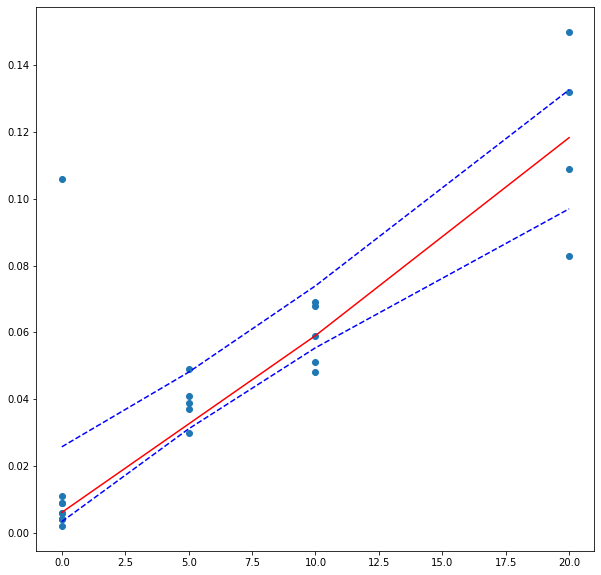

In [31]:
lws_outlier = lowess(df_outlier.y, df_outlier.x, frac=.7, delta=10)
model_outlier = ols("y ~ x", data=df_outlier).fit()
prediction = pd.concat([df, model_outlier.get_prediction().summary_frame(alpha=0.1)], axis=1)
prediction = prediction.sort_values('x')

plt.figure(figsize=(10,10))
plt.scatter(df_outlier.x, df_outlier.y)
plt.plot(lws_outlier[:, 0], lws_outlier[:, 1], 'r', lw=1.5)
plt.plot(prediction.x, prediction.mean_ci_lower, 'b--')
plt.plot(prediction.x, prediction.mean_ci_upper, 'b--')


display(lws_outlier)

#### Breusch-Pagan Test

Notice `model_outlier` that contains the erroneous recording value shows constant variance in the BP test. 

In [32]:
model_outlier = ols("y ~ x", data=df_outlier).fit()
model = ols("y ~ x", data=df).fit()

bpnames = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(f"critical value: {stats.chi2.ppf(0.95, 1)}")

display(list(zip(bpnames, het_breuschpagan(model_outlier.resid, model_outlier.model.exog, robust=False))))

display(list(zip(bpnames, het_breuschpagan(model.resid, model.model.exog, robust=False))))

critical value: 3.841458820694124


[('Lagrange multiplier statistic', 0.7507849770490509),
 ('p-value', 0.3862278161508912),
 ('f-value', 0.13283893031925484),
 ('f p-value', 0.7189863878861955)]

[('Lagrange multiplier statistic', 23.326014598146557),
 ('p-value', 1.3673802023848293e-06),
 ('f-value', 16.377156568214044),
 ('f p-value', 0.000580871180101769)]

### Figure 3.21 (p 143)

Regression Output and Diagnostic Plots for Untransformed Data -- Plutonium Measurement Example

##### Note

In the following 3 models, we're consolidating everything from Chapter 3. In particular, I'm building the contrast (version 2) model to compare both ANOVA output to contrast the pure error. Additionally, Breusch-Pagan tests are provided to present the test statistic for comparison (the critical value is the same in all cases). 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     229.0
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           9.08e-13
Time:                        20:44:53   Log-Likelihood:                 69.066
No. Observations:                  23   AIC:                            -134.1
Df Residuals:                      21   BIC:                            -131.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0070      0.004      1.954      0.064      -0.000       0.015
x              0.0055      0.000     15.133      0.000       0.005       0.006
==============================================================================
Omnibus:                        6.365   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.757
Skew:                          -0.186   Prob(JB):                       0.0341
Kurtosis:                       5.629   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,0.036190,0.036190,228.998394,9.077372e-13
Residual,21.0,0.003319,0.000158,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(x),3.0,0.036359,0.012120,73.08582,1.281842e-10
Residual,19.0,0.003151,0.000166,NaN,NaN


[('Lagrange multiplier statistic', 23.326014598146557),
 ('p-value', 1.3673802023848293e-06),
 ('f-value', 16.377156568214044),
 ('f p-value', 0.000580871180101769)]

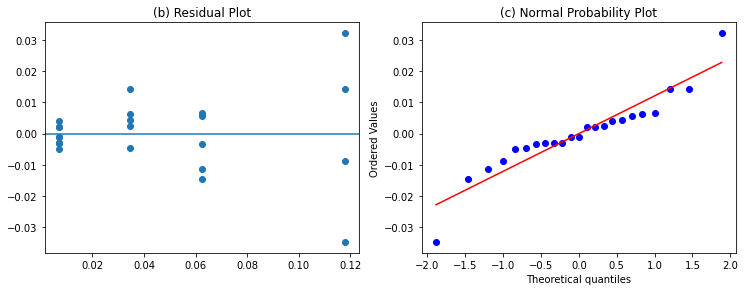

In [33]:
model = ols("y ~ x", data=df).fit()
model2 = ols("y ~ C(x)", data=df).fit()
display(model.summary())
display(anova_lm(model, typ=1))
display(anova_lm(model2, typ=1))
display(list(zip(bpnames, het_breuschpagan(model.resid, model.model.exog, robust=False))))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

axes[0].scatter(model.fittedvalues, model.resid)
axes[0].axhline(y=0)
qq = stats.probplot(model.resid, plot=axes[1])

axes[0].set_title("(b) Residual Plot")
axes[1].set_title("(c) Normal Probability Plot")
plt.show()

### Figure 3.22 (p 144)

Regression Output and Diagnostic Plots for Transformed Response Variable -- Plutonium Measurement Example

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     188.8
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           5.77e-12
Time:                        20:44:54   Log-Likelihood:                 46.579
No. Observations:                  23   AIC:                            -89.16
Df Residuals:                      21   BIC:                            -86.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0948      0.010      9.905      0.000       0.075       0.115
x              0.0134      0.001     13.740      0.000       0.011       0.015
==============================================================================
Omnibus:                        0.452   Durbin-Watson:                   2.471
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.491
Skew:                          -0.286   Prob(JB):                        0.782
Kurtosis:                       2.570   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,0.210847,0.210847,188.796013,5.766579e-12
Residual,21.0,0.023453,0.001117,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(x),3.0,0.222953,0.074318,124.448878,1.138797e-12
Residual,19.0,0.011346,0.000597,NaN,NaN


[('Lagrange multiplier statistic', 0.9313597412785093),
 ('p-value', 0.33450984625090996),
 ('f-value', 1.1425622834931506),
 ('f p-value', 0.29724504078178343)]

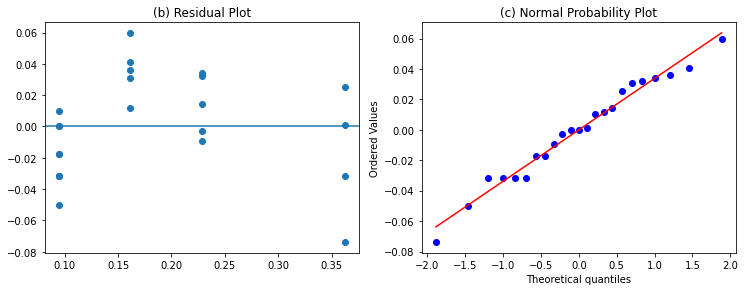

In [34]:
modely = ols("y ~ x", data=dfy).fit()
modely2 = ols("y ~ C(x)", data=dfy).fit()
display(modely.summary())
display(anova_lm(modely, typ=1))
display(anova_lm(modely2, typ=1))
display(list(zip(bpnames, het_breuschpagan(modely.resid, modely.model.exog, robust=False))))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

axes[0].scatter(modely.fittedvalues, modely.resid)
axes[0].axhline(y=0)
qq = stats.probplot(modely.resid, plot=axes[1])

axes[0].set_title("(b) Residual Plot")
axes[1].set_title("(c) Normal Probability Plot")
plt.show()

### Figure 3.23 (p 145)

Regression Output and Diagnostic Plots for Transformed Response and Predictor Variables -- Plutonium Measurement Example

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     360.9
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.05e-14
Time:                        20:44:54   Log-Likelihood:                 53.469
No. Observations:                  23   AIC:                            -102.9
Df Residuals:                      21   BIC:                            -100.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0730      0.008      9.323      0.000       0.057       0.089
x              0.0573      0.003     18.998      0.000       0.051       0.064
==============================================================================
Omnibus:                        0.889   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.532
Skew:                           0.367   Prob(JB):                        0.766
Kurtosis:                       2.866   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,0.221416,0.221416,360.916617,1.045884e-14
Residual,21.0,0.012883,0.000613,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
C(x),3.0,0.222953,0.074318,124.448878,1.138797e-12
Residual,19.0,0.011346,0.000597,NaN,NaN


[('Lagrange multiplier statistic', 3.852910591206875),
 ('p-value', 0.04965974331926765),
 ('f-value', 4.5949709195035355),
 ('f p-value', 0.04393029617380015)]

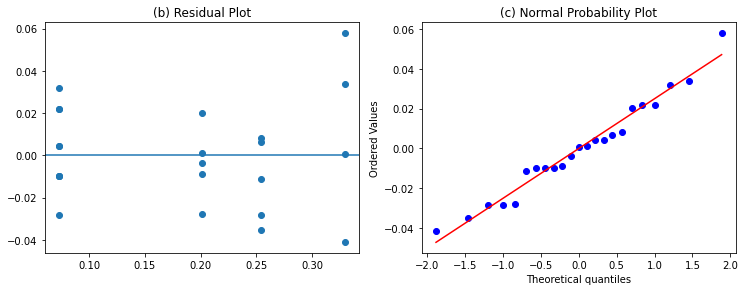

In [35]:

modelxy = ols("y ~ 1 + x", data=dfxy).fit()
modelxy2 = ols("y ~ C(x)", data=dfxy).fit()
display(modelxy.summary())
display(anova_lm(modelxy, typ=1))
display(anova_lm(modelxy2, typ=1))
display(list(zip(bpnames, het_breuschpagan(modelxy.resid, modelxy.model.exog, robust=False))))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

axes[0].scatter(modelxy.fittedvalues, modelxy.resid)
axes[0].axhline(y=0)
qq = stats.probplot(modelxy.resid, plot=axes[1])

axes[0].set_title("(b) Residual Plot")
axes[1].set_title("(c) Normal Probability Plot")
plt.show()

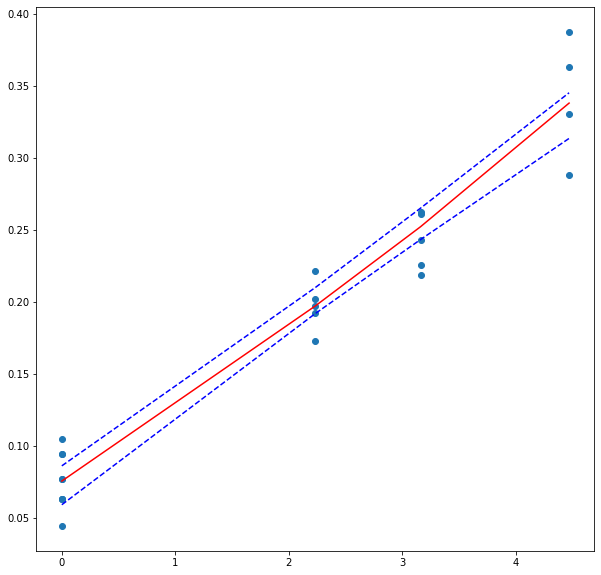

In [36]:
lws = lowess(dfxy.y, dfxy.x)
prediction = pd.concat([dfxy, modelxy.get_prediction().summary_frame(alpha=0.1)], axis=1)
prediction = prediction.sort_values('x')

plt.figure(figsize=(10,10))
plt.scatter(dfxy.x, dfxy.y)
plt.plot(prediction.x, prediction.mean_ci_lower, 'b--')
plt.plot(prediction.x, prediction.mean_ci_upper, 'b--')
plt.plot(lws[:, 0], lws[:, 1], 'r', lw=1.5)

# References

[Linear Model Regression Results (statsmodels)](https://www.statsmodels.org/v0.12.1/generated/statsmodels.regression.linear_model.RegressionResults.html)

[Contrast Coding (statsmodels)](https://www.statsmodels.org/stable/examples/notebooks/generated/contrasts.html)

[QQ Plot or Normal Probability Plot (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

[Levene or Brown-Forsythe Test (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

[Z-Score Transformation (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

[Box Cox Transformations (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

### Graphics

[Pandas Plotting](https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html)

[Matplotlib Color Maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)